In [23]:
# import
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# read files
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"

fdf = pd.read_csv(features_path)
fdf[fdf.columns[3:]] = fdf[fdf.columns[3:]].apply(pd.to_numeric, errors='coerce')
ddf = pd.read_csv(os.path.join(data_path, "mko_integrated.csv"))

In [177]:
fdfg = fdf.filter(regex = 'cow|_len|eu|gd|lfrb').groupby("cow").median().reset_index()

In [198]:
# merge files 
df = fdfg.merge(ddf, on = ["cow"], how = "left")
df["ko_cow"] = [1 if df.iloc[i].dko_udder_dim_cl > 10 else 0 for i in range(len(df.cow))]
df["ko_back"] = [1 if (df.iloc[i].dko_lb_dim_cl > 5) |  (df.iloc[i].dko_rb_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_front"] = [1 if (df.iloc[i].dko_lf_dim_cl > 5) |  (df.iloc[i].dko_rf_dim_cl > 5) else 0 for i in range(len(df.cow))]

for i in range(len(df.cow)):
    # print(df.iloc[i].dko_rf_dim_cl)
    if (df.iloc[i].dko_lf_dim_cl > 5):
        df.loc[i,"kolf"] = 'a' 
    if (df.iloc[i].dko_rf_dim_cl > 5):
        df.loc[i, "korf"] = 'a'
    if (df.iloc[i].dko_rb_dim_cl > 5):
        df.loc[i,"korb"] = 'a'
    if (df.iloc[i].dko_lb_dim_cl > 5):
        df.loc[i, "kolb"] = 'a'

In [199]:
sum(df["ko_front"])

23

In [200]:
df["ko_front"]

0      0
1      0
2      0
3      0
4      0
      ..
133    0
134    0
135    0
136    1
137    0
Name: ko_front, Length: 138, dtype: int64

In [201]:
df2 = df.filter(regex = r'cow|len|eu|dko_.*dim_cl')
df2[df2.ko_cow ==1]

,cow,front_eu,back_eu,right_eu,left_eu,lf_len,rf_len,lb_len,rb_len,dko_lb_dim_cl,dko_lf_dim_cl,dko_rf_dim_cl,dko_rb_dim_cl,dko_udder_dim_cl,ko_cow
15,929,20.940308,NaN,21.348085,21.454584,40.150599,40.316911,24.849285,25.323067,0.000000,7.142857,0.000000,14.285714,21.428571,1
27,1057,19.595861,13.056364,NaN,25.820303,NaN,NaN,33.962868,42.906976,10.000000,10.000000,5.000000,15.000000,30.000000,1
42,1153,14.389651,7.120423,18.621721,19.024252,40.947683,38.044698,31.322683,30.425242,12.000000,1.333333,0.000000,6.666667,14.666667,1
44,1163,20.255727,10.457234,NaN,NaN,NaN,40.227106,49.780916,40.486492,49.000000,1.000000,6.000000,31.000000,60.000000,1
45,1164,17.569857,9.679826,21.203984,17.828950,51.229650,28.673349,45.493460,36.987102,0.000000,0.000000,13.043478,0.000000,13.043478,1
50,1177,NaN,NaN,NaN,16.237027,34.193025,NaN,NaN,NaN,NaN,15.000000,0.000000,0.000000,15.000000,1
51,1192,12.953775,7.969234,19.291500,19.439966,45.305832,40.616581,NaN,21.298341,10.198300,1.416431,0.849858,4.532578,14.164306,1
52,1198,21.458445,9.193391,20.125270,23.144621,39.422950,40.471688,33.408845,26.034027,10.032362,3.559871,2.912621,4.854369,15.210356,1
59,1233,16.764366,9.901841,21.870781,21.987224,47.595497,49.624468,35.839812,37.627808,0.406504,7.723577,3.252033,0.406504,11.382114,1
62,1243,18.308873,8.546482,20.319960,22.106954,41.868653,36.649261,36.918368,24.605197,1.626016,0.813008,7.723577,2.032520,11.382114,1


<Axes: xlabel='ko_back', ylabel='back_gd'>

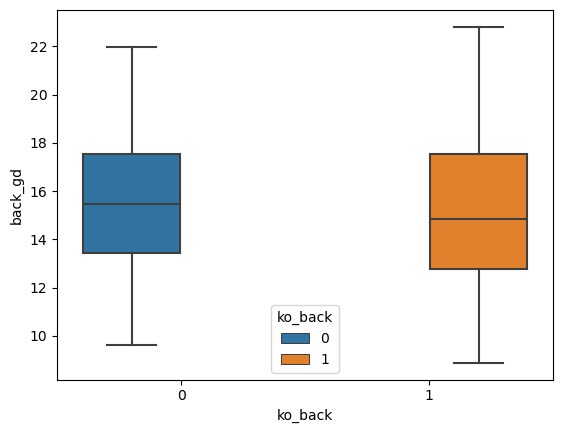

In [202]:
sns.boxplot(data=df, y="back_gd", x = "ko_back", hue = "ko_back")

<Axes: xlabel='ko_front', ylabel='front_gd'>

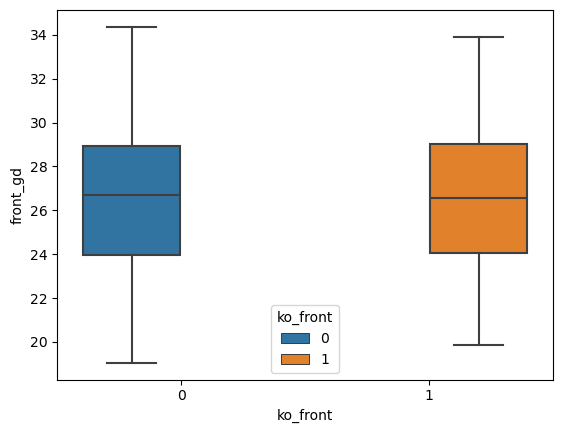

In [203]:
sns.boxplot(data=df, y="front_gd", x = "ko_front", hue = "ko_front")

<Axes: xlabel='ko_back', ylabel='back_eu'>

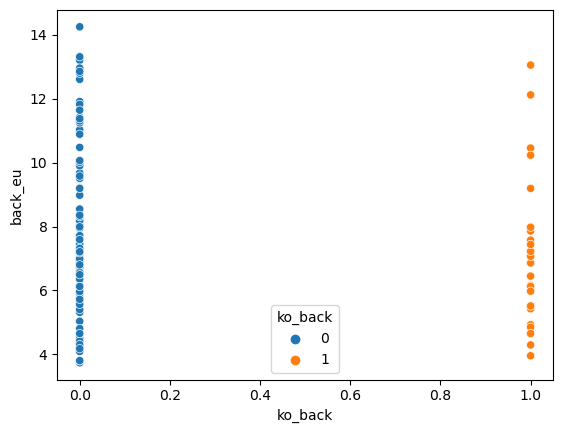

In [222]:
sns.scatterplot(data=df, y="back_eu", x = "ko_back", hue = "ko_back")

<Axes: xlabel='ko_front', ylabel='front_eu'>

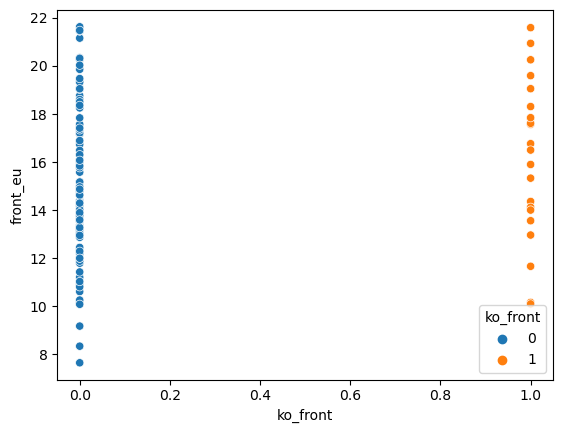

In [221]:
sns.scatterplot(data=df, y="front_eu", x = "ko_front", hue = "ko_front")

In [216]:
mdf = pd.melt(df, value_vars = ['rf_len', 'rb_len', 'lb_len', 'lf_len'], id_vars =['cow', "ko_cow", "kolf", "korf", "korb", "kolb"])
mdf = pd.melt(df, value_vars = ['back_eu', 'front_eu'], id_vars =['cow', "ko_cow", "kolf", "korf", "korb", "kolb", "ko_back", "ko_front"])

,cow,ko_cow,kolf,korf,korb,kolb,ko_back,ko_front,variable,value
0,627,0,n,n,n,n,0,0,back_eu,7.202212
1,723,0,n,n,n,n,0,0,back_eu,8.338149
2,729,0,n,n,n,n,0,0,back_eu,6.701473
3,736,0,n,n,n,n,0,0,back_eu,5.309200
4,764,0,n,n,n,n,0,0,back_eu,8.040842
...,...,...,...,...,...,...,...,...,...,...
271,1486,1,n,n,n,a,1,0,front_eu,11.027363
272,1487,1,n,n,a,n,1,0,front_eu,16.073776
273,1495,0,n,n,a,n,1,0,front_eu,14.291566
274,1501,1,a,a,a,a,1,1,front_eu,16.498889


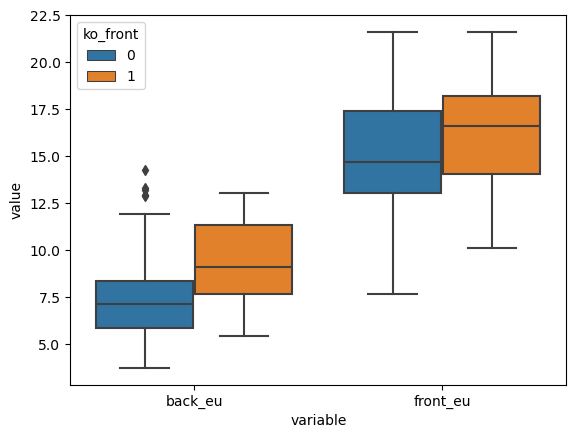

In [217]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_front")
mdf